In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
%matplotlib inline

### The data is formed by three .txt files which includes DNA sequences from humans (human_data.txt), chimpansees (chimp_data.txt) and dogs (dog_data.txt)

In [6]:
human_data = pd.read_table('human_data.txt')
chimp_data = pd.read_table('chimp_data.txt')
dog_data = pd.read_table('dog_data.txt')
human_data.head()
chimp_data.head()
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


### Since I will be using K-mers, I need to convert sequence strings into k-mer words with the default size 6 (hexamer words)

In [7]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [8]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [9]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [10]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values

chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values                       

dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values   

### Creating the Bag of Words model using CountVectorizer() this is equivalent to k-mer counting, by looking at the papers, I have found out that the ngram of 4 performed the best

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [12]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


<AxesSubplot:>

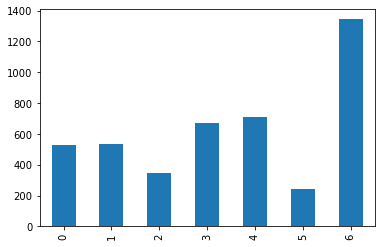

In [13]:
human_data['class'].value_counts().sort_index().plot.bar()

### Splitting the human dataset into the training set and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3504, 232414)
(876, 232414)
(3504,)
(876,)


In [16]:
words = cv.get_feature_names()
term_matrix = pd.DataFrame(X_train.toarray(), columns=words)
term_matrix.head()

,aaaaaa aaaaaa aaaaaa aaaaaa,aaaaaa aaaaaa aaaaaa aaaaac,aaaaaa aaaaaa aaaaaa aaaaag,aaaaaa aaaaaa aaaaaa aaaaat,aaaaaa aaaaaa aaaaac aaaaca,aaaaaa aaaaaa aaaaac aaaacc,aaaaaa aaaaaa aaaaac aaaacg,aaaaaa aaaaaa aaaaac aaaact,aaaaaa aaaaaa aaaaag aaaaga,aaaaaa aaaaaa aaaaag aaaagc,...,tttttt tttttt tttttc ttttcg,tttttt tttttt tttttc ttttct,tttttt tttttt tttttg ttttga,tttttt tttttt tttttg ttttgc,tttttt tttttt tttttg ttttgg,tttttt tttttt tttttg ttttgt,tttttt tttttt tttttt ttttta,tttttt tttttt tttttt tttttc,tttttt tttttt tttttt tttttg,tttttt tttttt tttttt tttttt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print("An example is", human_texts[120])

An example is atgaaa tgaaag gaaagt aaagtg aagtgt agtgtg gtgtgt tgtgtg gtgtga tgtgag gtgaga tgagaa gagaaa agaaag gaaagt aaagtt aagttc agttca gttcaa ttcaac tcaacg caacga aacgaa acgaaa cgaaaa gaaaag aaaagg aaaggt aaggta aggtac ggtaca gtacaa tacaac acaaca caacat aacatc acatcg catcgt atcgta tcgtac cgtaca gtacaa tacaat acaatg caatga aatgaa atgaag tgaagt gaagtc aagtcg agtcgc gtcgct tcgctg cgctga gctgat ctgatg tgatga gatgag atgagc tgagct gagctg agctgg gctggt ctggtg tggtgt ggtgtc gtgtca tgtcag gtcaga tcagag cagagt agagtt gagttc agttca gttcac ttcacc tcacca caccaa accaat ccaatt caattc aattca attcaa ttcaaa tcaaat caaata aaataa aataac ataacc taacca aaccat accatt ccattt catttg atttgg tttggc ttggct tggctg ggctgc gctgct ctgctg tgctga gctgat ctgatt tgattc gattcg attcgg ttcggc tcggct cggctt ggctta gcttat cttatg ttatga tatgat atgatc tgatca gatcag atcaga tcagaa cagaag agaaga gaagaa aagaac agaaca gaacat aacatt acatta cattag attagg ttaggc taggcg aggcga ggcgaa gcgaag cgaaga gaagag aagagt agagtt gagttt agttta

In [18]:
X_train[(y_train == 1)].toarray().sum() + X_train[(y_train == 0)].toarray().sum()

1302996

In [19]:
test_x = np.array([[0, 1, 1],
                   [1, 2, 1],
                   [6, 3, 1],
                   [1, 4, 1]])
test_y = np.array([0, 1, 1, 0])
test_x[(test_y == 1)].sum(axis=0)[1]

5

### The class bellow is implemented using the multinomial naive bayes classifier structure given in this picture
![alt text](Screenshot1.png "Image with MultinomialNB structure")

In [104]:
class multinomialNB:
    def __init__(self, alpha=1):
        self.alpha = alpha 

    def fit(self, X_train, y_train):
        m, n = X_train.shape
        self._classes = np.unique(y_train)
        n_classes = len(self._classes)
        self._priors = np.zeros(n_classes)
        self._likelihoods = np.zeros((n_classes, n))
        for idx, c in enumerate(self._classes):
            X_train_c = X_train[c == y_train]
            self._priors[idx] = X_train_c.shape[0] / m 
            self._likelihoods[idx, :] = ((X_train_c.sum(axis=0)) + self.alpha) / (np.sum(X_train_c.sum(axis=0) + self.alpha))

    def predict(self, X_test):
        return [self._predict(x_test) for x_test in X_test]

    def _predict(self, x_test):
        print(x_test)
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior_c = np.log(self._priors[idx])
            likelihoods_c = self.calc_likelihood(self._likelihoods[idx,:], x_test)
            posteriors_c = np.sum(likelihoods_c) + prior_c
            posteriors.append(posteriors_c)
        return self._classes[np.argmax(posteriors)]

    def calc_likelihood(self, cls_likeli, x_test):
        return np.log(cls_likeli) * x_test

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.sum(y_pred == y_test)/len(y_test)

In [105]:
classifier_stratch = multinomialNB(alpha=0.1)
classifier_stratch.fit(X_train, y_train)

In [106]:
X_test.shape

(876, 232414)

In [109]:
X1_test = pd.DataFrame(X_test.toarray())
X1_test.shape
y_pred_stratch = classifier_stratch.predict(X1_test)

(876, 232414)

# The sklearn MultinomialNB model

In [96]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Testing how the model sklearn perfoms on all three datasets

In [97]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [98]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [99]:
# Predicting the chimp and dog sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

# performance on chimp genes
print("Confusion matrix for chimp genes\n")
print(pd.crosstab(pd.Series(y_chimp, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chimp, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


# performance on dog genes
print("\n")
print("Confusion matrix for dog genes\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for chimp genes

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


Confusion matrix for dog genes

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


# The multinomialNB model built from stratch

In [100]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_stratch, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_stratch)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix



NameError: name 'y_pred_stratch' is not defined

In [101]:
# Predicting the chimp and dog sequences
y_pred_chimp = classifier_stratch.predict(X_chimp)
y_pred_dog = classifier_stratch.predict(X_dog)

# performance on chimp genes
print("Confusion matrix for chimp genes\n")
print(pd.crosstab(pd.Series(y_chimp, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chimp, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


# performance on dog genes
print("\n")
print("Confusion matrix for dog genes\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

ValueError: dimension mismatch